In [1]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [2]:
def plot_occupancy_by_name(detector_name,x_cfg,y_cfg,z_cfg):
    """ Fills XY and Z occupancy distribution

    :param detector_name: cb_EMCAL
    :param x_cfg: [xbins, xmin, xmax]
    :param y_cfg: [ybins, ymin, ymax]
    :param z_cfg: [zbins, zmin, zmax]
    :return: xy_hist, z_hist
    """

    xbins, xmin, xmax = tuple(x_cfg)
    ybins, ymin, ymax = tuple(y_cfg)
    zbins, zmin, zmax = tuple(z_cfg)

    # Apply filter
    fltr_by_name = hit_vol[:,:,:len(detector_name)]==detector_name
    hit_x_sel = hit_x[fltr_by_name]
    hit_y_sel = hit_y[fltr_by_name]
    hit_z_sel = hit_z[fltr_by_name]

    # Plot xy histogram
    xy_hist = Hist(
       hist.axis.Regular(xbins, xmin, xmax, name="X", label="x [cm]", flow=False),
       hist.axis.Regular(ybins, ymin, ymax, name="Y", label="y [cm]", flow=False),
    )
    xy_hist.fill(ak.to_numpy(ak.flatten(hit_x_sel/10)), ak.to_numpy(ak.flatten(hit_y_sel/10)))

    # Plot z histogram
    z_hist = Hist(hist.axis.Regular(zbins, zmin, zmax, name="z", label="z [cm]", flow=False),)
    z_hist.fill(ak.to_numpy(ak.flatten(hit_z_sel/10)))
    
    return xy_hist, z_hist
    

In [3]:
file=uproot4.open("test_run.root")

# To see all object names in the file:
file.items()

[('events;4', <TTree 'events' (76 branches) at 0x7fadcc7cccd0>),
 ('events;3', <TTree 'events' (76 branches) at 0x7fad67366130>)]

In [4]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

#Uncomment this to see all values:
#tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

Number of entries: 1000


In [5]:
# To load WHOLE data from a branch as an array:
hit_id = tree['hit_id'].array()
hit_x = tree['hit_x'].array()
hit_y = tree['hit_y'].array()
hit_z = tree['hit_z'].array()
hit_vol = tree['hit_vol_name'].array()

In [6]:
xy_hist, z_hist = plot_graphs('cb_EMCAL', [50, -250, 250], [50, -250, 250], [50, -200, 200])

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fad5dd1baf0>, errorbar=None, legend_artist=None)]

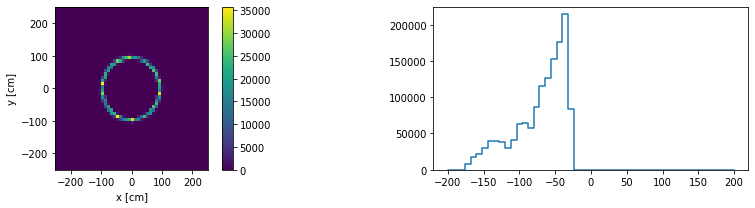

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
xy_hist.plot(ax = axes[0])
z_hist.plot(ax = axes[1])

#fig.tight_layout()

In [8]:
# f, g=plot_graphs('ci_EMCAL',-250,-250,50)
# q, r=plot_graphs('ce_EMCAL',-250,-250,50)
# q, r=plot_graphs('fi_B0',-100,-100,50)



